In [1]:
import random
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

<ipython-input-1-067952f0726e>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
url = 'https://hilpisch.com/aiif_eikon_eod_data.csv'

raw = pd.read_csv(url, index_col=0, parse_dates=True)

symbol = 'EUR='

#rendimenti del benchmark rialzista (solo long)
raw['bull'] = np.log(raw[symbol] / raw[symbol].shift(1))

data = pd.DataFrame(raw['bull']).loc['2015-01-01':]

data.dropna(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2015-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bull    1305 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


In [3]:
np.random.seed(100)

#i rendimenti del benchmark casuale
data['random'] = np.random.choice([-1, 1], len(data)) * data['bull']

#i rendimenti del benchmark ribassista (solo short)
data['bear'] = -data['bull']

def top(t):
  top = pd.DataFrame(data['bull'])
  top.columns = ['top']
  top = top.sort_values('top')
  n = int(len(data) * t)
  top['top'].iloc[:n] = abs(top['top'].iloc[:n])
  top['top'].iloc[n:] = abs(top['top'].iloc[n:])
  top['top'].iloc[n:-n] = np.random.choice([-1, 1],
    len(top['top'].iloc[n:-n])) * top['top'].iloc[n:-n]
  data[f'{int(t * 100)}_top'] = top.sort_index()

#i rendimenti della strategia X% superiore
for t in [0.1, 0.15]:
  top(t)

def afi(ratio):
  correct = np.random.binomial(1, ratio, len(data))
  random = np.random.choice([-1, 1], len(data))
  strat = np.where(correct, abs(data['bull']), random * data['bull'])
  data[f'{int(ratio * 100)}_afi'] = strat

#Il rendimento della strategia X% ANI
for ratio in [0.51, 0.6, 0.75, 0.9]:
  afi(ratio)

In [8]:
data.head()

,bull,random,bear,10_top,15_top,51_afi,60_afi,75_afi,90_afi
Date,,,,,,,,,
2015-01-01,0.000413,-0.000413,-0.000413,0.000413,-0.000413,0.000413,0.000413,0.000413,0.000413
2015-01-02,-0.008464,0.008464,0.008464,0.008464,0.008464,0.008464,0.008464,0.008464,0.008464
2015-01-05,-0.005767,-0.005767,0.005767,-0.005767,0.005767,-0.005767,0.005767,-0.005767,0.005767
2015-01-06,-0.003611,-0.003611,0.003611,-0.003611,0.003611,0.003611,0.003611,0.003611,0.003611
2015-01-07,-0.004299,-0.004299,0.004299,0.004299,0.004299,0.004299,0.004299,0.004299,0.004299


In [5]:
data.sum().apply(np.exp)

bull       0.926676
random     1.097137
bear       1.079126
10_top     9.815383
15_top    21.275448
51_afi    12.272497
60_afi    22.103642
75_afi    49.227314
90_afi    98.176658
dtype: float64

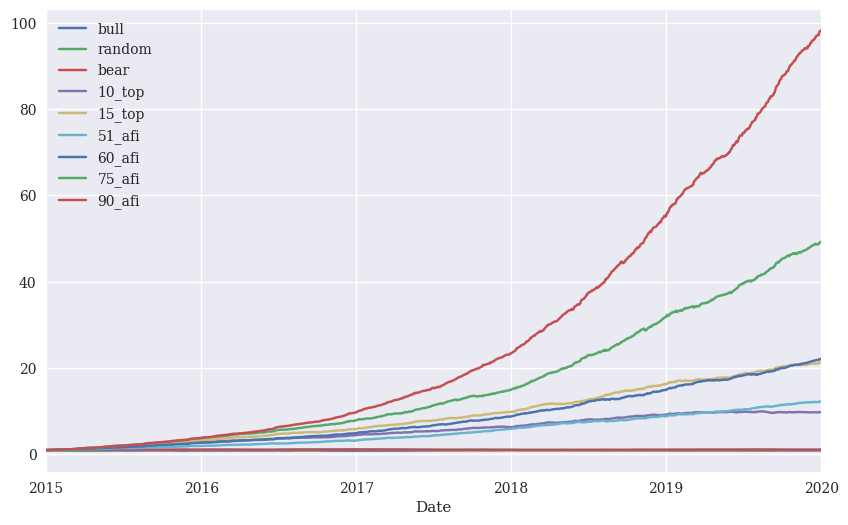

In [9]:
data.cumsum().apply(np.exp).plot(figsize=(10, 6));